<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **데이터 불러오기**

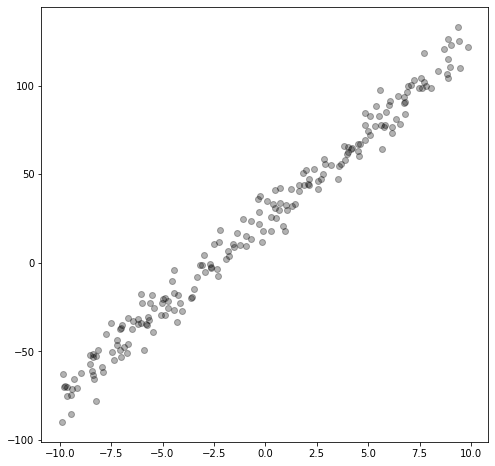

In [242]:
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/Colab Notebooks/data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3, color = 'black')
plt.show()

# **Linear Regression 구현**

In [0]:
#세타 0, 세타 1 값을 조건에 맞게 초기화
theta0 = -30
theta1 = -30
length = len(y_data)

hx = theta0 + theta1 * x_data
temp_energy = sum((hx-y_data)**2) / (length * 2)

#세타, 로스 보관소
theta0_val = [theta0]
theta1_val = [theta1]
energy_val = [temp_energy]

#학습률
alpha = 0.01

while True:
  gra_theta0 = sum((hx-y_data)) / length
  gra_theta1 = sum((hx-y_data)*x_data) / length

  theta0 -= alpha * gra_theta0
  theta1 -= alpha * gra_theta1
  hx = theta0 + theta1 * x_data
  next_energy = sum((hx-y_data)**2) / (length * 2)
  
  theta0_val.append(theta0)
  theta1_val.append(theta1)
  energy_val.append(next_energy)

  if(temp_energy - next_energy < 0.01):
    break;
  temp_energy = next_energy

# **결과값 시각화**

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)720896/45929032 bytes (1.6%)2048000/45929032 bytes (4.5%)3923968/45929032 bytes (8.5%)6561792/45929032 bytes (14.3%)10215424/45929032 bytes (22.2%)13320192/45929032 bytes (29.0%)16785408/45929032 bytes (36.5%)20209664/45929032 bytes (44.0%)23879680/45929032 bytes (52.0%)27533312/45929032 bytes (59.9%)31080448/45929032 bytes (67.7%)34947072/45929032 bytes (76.1%)3854336

100%|██████████| 101/101 [00:04<00:00, 23.84it/s]


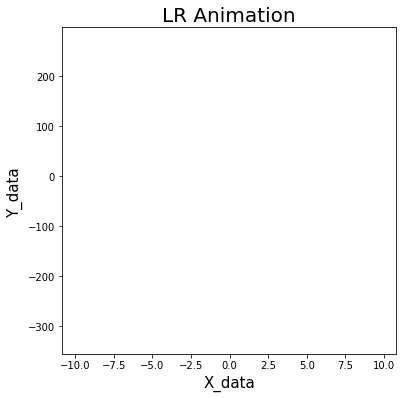

In [249]:
#애니메이션 그래프를 쉽게 지원해주는 celluloid library..
from celluloid import Camera
from matplotlib import gridspec
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)
%matplotlib inline

#gif파일로 변환해주는 라이브러리
from moviepy.editor import *

fig, ax = plt.subplots(figsize = (6,6)) 
camera = Camera(fig) 

for i in range(0,404,4):
  hx = theta0_val[i] + theta1_val[i]*x_data 
  ax0 = plt.subplot(111)
  ax0.scatter(x_data,y_data,color = 'black')
  plot = ax0.plot(x_data,hx,color = 'red')
  ax0.set_xlabel("X_data",fontsize = 15)
  ax0.set_ylabel("Y_data", fontsize = 15)
  ax0.set_title("LR Animation", fontsize = 20)
  plt.legend(plot,["theta0 : {:.2f} theta1 : {:.2f}".format(theta0_val[i],theta1_val[i])])
  camera.snap()     # 그 순간을 촬영

animation = camera.animate(interval = 300) #0.3초 간격으로 그래프를 다시 그림

#mp4 형식으로 저장하기
animation.save(
    'LRAnimation.mp4',
    dpi = 100,
    savefig_kwargs = {
        'frameon':False,
        'pad_inches': 'tight'
    }
)
#gif 파일로 변환
clip = (VideoFileClip("LRAnimation.mp4"))
clip.write_gif("LRAnimation.gif")

# **결과 값 시각화2**

In [0]:
import matplotlib.pyplot as plt
#matplotlib 3d 그림 라이브러리
from mpl_toolkits.mplot3d import Axes3D

theta0 = np.arange(-30,30,0.1)
theta1 = np.arange(-30,30,0.1)
#세타1과 세타0을 3차원 상의 모든 좌표로 표현함
T0,T1 = np.meshgrid(theta0,theta1)

#에너지 행렬 만들기
energy_surface = np.zeros((600,600))

#loss function 표현
for i in range(600):
  for j in range(600):
    energy_surface[i,j] = sum((T0[i,j] + T1[i,j]*x_data - y_data)**2) / (length * 2)

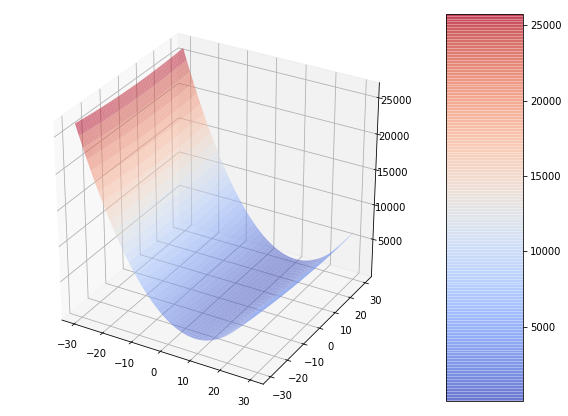

In [246]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(T1,T0,energy_surface,cmap = 'coolwarm',linewidth = 0.5, antialiased = True, alpha = 0.5)
fig.colorbar(surf, shrink = 3, aspect = 5)  # shrink, aspect 컬러바 크기
fig.tight_layout() # 그래프를 조금 균형잡히게 만들어 줌
plt.show()

# **최적화 곡선 나타내기**

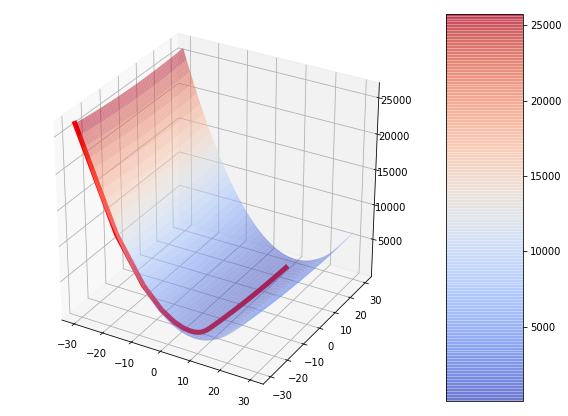

In [248]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(T1,T0,energy_surface,cmap = 'coolwarm',linewidth = 0.5, antialiased = True, alpha = 0.5)
fig.colorbar(surf, shrink = 3, aspect = 5)  # shrink, aspect 컬러바 크기
plt.plot(theta1_val,theta0_val,energy_val, linewidth = 5, color = 'red')
fig.tight_layout() # 그래프를 조금 균형잡히게 만들어 줌
plt.show()